# Project 3# Classification

### Classification On One the Datasets on https://archive.ics.uci.edu

#### For this project I decided to work on popular Iris Data Set https://archive.ics.uci.edu/ml/datasets/Iris

In [30]:
"""
Import Cell / Importing necessarry libraries
"""
import graphviz
import numpy as np
import pandas as pd
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.utils.multiclass import unique_labels


# Load Data

In [31]:
"""
Loading Iris DataSet: (2 ways)
First: Since it's so popular, it's been added to sklearn library datasets so we can call it from there
Second: We can Save the Data in directory and and call data afterwards
"""

iris = datasets.load_iris()
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [32]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
iris.data.shape

(150, 4)

In [34]:
iris.target.shape

(150,)

In [35]:
class_names = iris.target_names
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [36]:
X_test.shape

(38, 4)

# Visualizing Data

In [44]:
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)

iris = sns.load_dataset("iris")

##### Let's see the class distribution of the data

In [45]:
#class distribution
print(iris.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


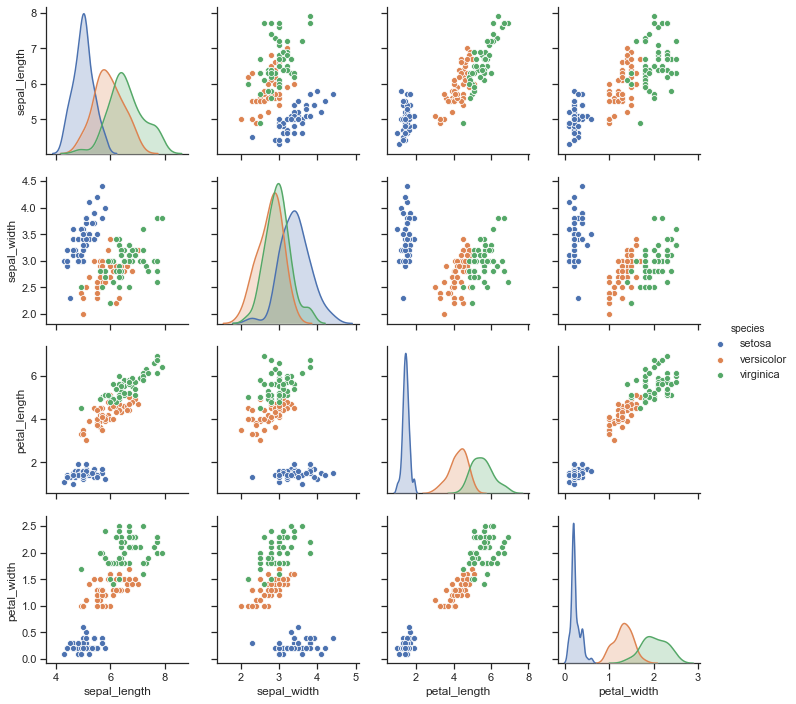

In [46]:
g = sns.pairplot(iris, hue="species")
g.savefig("scatter.png", bbox_inches='tight', dpi=1200)

##### Well, let's take a look at the result!
##### It's actually very interesting. As I look at the images above, it seemslike 'setosa' species is completely separable from other two classes. And I expect every classification algorithm does a good job classifing 'setosa'. Even if I execute a clustering algorithm, setosa species should be completely a distinct cluster. the error rate of classifying algorithms may occure when trying to distinguish 'versicolor' and 'virginica' species from each other.


##### Let's know more about our data and attributes

In [47]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


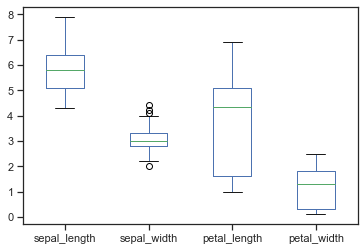

In [48]:
iris.plot.box()


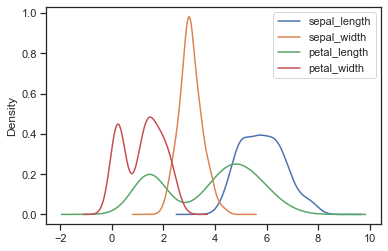

In [49]:
f = iris.plot.kde()


##### I think we've known our data a little bit... Let's proceed to the next level

# Decision Tree Classifier

The first step is to build a Decision Tree Classfier with say, with metric Information Gain

In [37]:
model = tree.DecisionTreeClassifier(criterion='entropy')

In [38]:
model = model.fit(X_train,y_train)
import sklearn
sklearn.__version__

'0.21.3'

In [39]:
y_pred = model.predict(X_test)

In [40]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [41]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


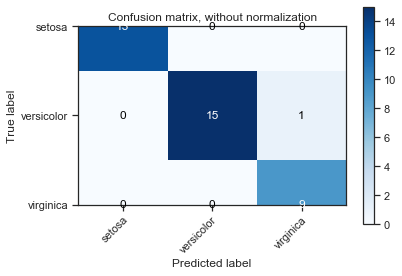

In [43]:
class_names = iris.target_names

f = plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')



[Text(167.4, 199.32, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue

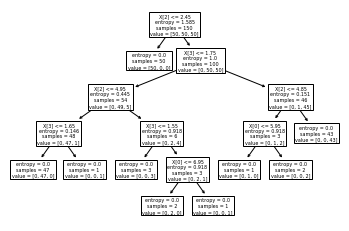

In [15]:
tree.plot_tree(model.fit(iris.data, iris.target)) 

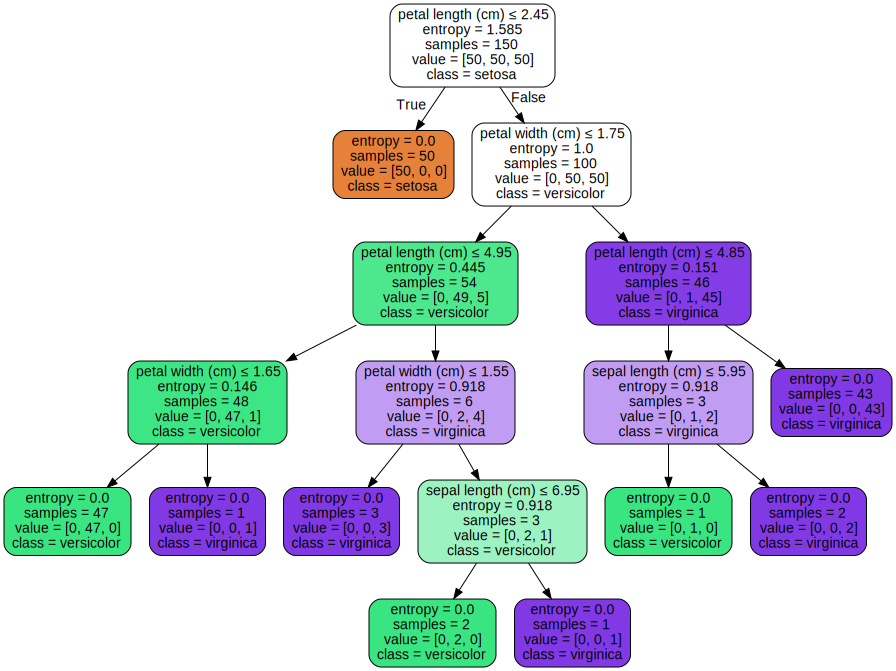

In [16]:
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 



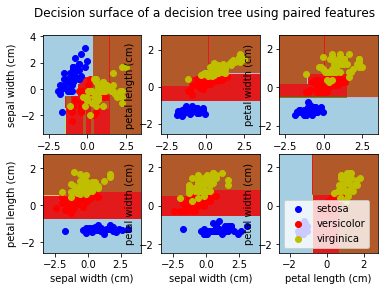

In [17]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

##### Our Decision Tree Classifier is complete... It's really interesting too look at pictures above. As we mentioned before, it's like 'setosa' class is actually separable, after we saw some visualization of data, and Decison Tree saw this feature, too, very fast. In fact, the first split in tree, completely classifies 'setosa' spicies and all the other parts of tree are just for classifying two remaining species.
##### After a Decision Tree, let's see how we can prune our tree. For this purpose, in the python implementation of Decison Tree algorithm we can work on the parameter max_depth of tree.

In [18]:
"""
For pruning the decision tree algorithm, we shall find best number, k, as a our max_depth parameter for decision tree algorithm.
Finding parameter k, is actually model selection problem and we'll use 10-fold cross-validation algorithm, to determine the best
number for k.
"""

k_candidates = list(range(2, 20))
cv_scores = []

for k in k_candidates:
    
    dtc = tree.DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(dtc, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
print(k_candidates[cv_scores.index(max(cv_scores))])

3


In [19]:
k_candidates

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [20]:
cv_scores

[0.9533333333333334,
 0.9800000000000001,
 0.9623076923076924,
 0.9448834498834499,
 0.9525757575757575,
 0.9609090909090909,
 0.9539743589743589,
 0.9532167832167833,
 0.9609090909090909,
 0.9616666666666667,
 0.9532167832167833,
 0.9525757575757575,
 0.9448834498834499,
 0.9609090909090909,
 0.9448834498834499,
 0.9532167832167833,
 0.9609090909090909,
 0.9532167832167833]

Text(0, 0.5, 'Cross-validated accuracy')

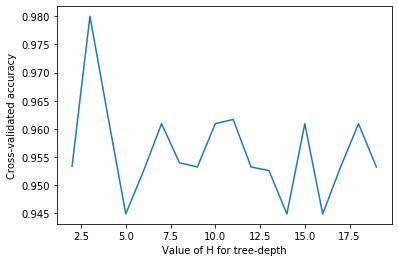

In [21]:
# plot the value of K for max_depth of the tree (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)

plt.plot(k_candidates, cv_scores)
plt.xlabel('Value of H for tree-depth')
plt.ylabel('Cross-validated accuracy')

Looks like k=3, is our number!!

In [22]:
entropy_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [23]:
entropy_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
entropy_model.score(X_test, y_test)

0.9736842105263158

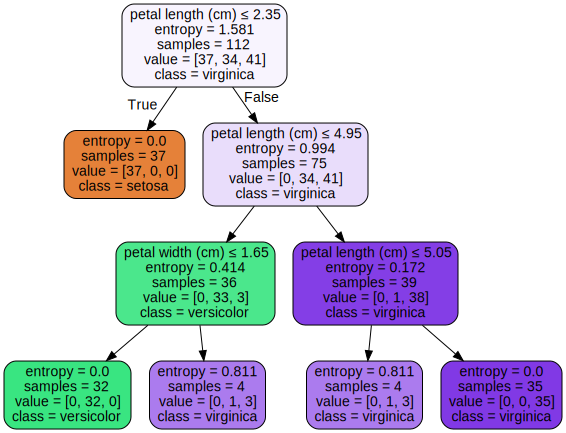

In [25]:
dot_data = tree.export_graphviz(entropy_model, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 

# Bayesian Classifier

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"% (iris.data.shape[0],(iris.target != y_pred).sum()))

Number of mislabeled points out of a total 150 points : 6


# Ensemble methods

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

## Bagging Methods

### Bagged Decision Tree

In [33]:
classifer = tree.DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator=classifer, n_estimators=100)
results = cross_val_score(model, iris.data, iris.target, cv=10, scoring='accuracy')

print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")

Accuracy: 0.95 (+/- 0.07)


### Random Fores

In [34]:
model = RandomForestClassifier(n_estimators=100, max_features=3)
results = cross_val_score(model, iris.data, iris.target, cv=10)

print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")

Accuracy: 0.95 (+/- 0.07)


### AdaBoost

In [35]:
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
                             
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")

Accuracy: 0.95 (+/- 0.03)


# References

[1] https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html <br>
[2] https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html <br>
[3] Zhu, H. Zou, S. Rosset, T. Hastie, “Multi-class AdaBoost”, 2009.
